# Search and Download Sentinel 2 imagery using Sentinelsat API

Make sure all the libraries are installed below. Use conda if possible <br>
For Sentinelsat use <br>
<br>pip install sentinelsat 
<br>
<br>
At the conda prompt or at the cmd prompt

### Getting help
refer to the following links
<br>
sentinelsat git hub - https://github.com/sentinelsat/sentinelsat
<br>
sentinelsat API docs - https://sentinelsat.readthedocs.io/en/stable/api.html
<br>
<br>
virtually everything you will see here has been borrowed or adpated from here, I've just added a bit of folium and unzipping

### Import libraries

In [1]:
!pip install geopandas
!pip install sentinelsat

     |████████████████████████████████| 994 kB 12.5 MB/s 
     |████████████████████████████████| 15.4 MB 33 kB/s 
     |████████████████████████████████| 6.3 MB 38.2 MB/s 
     |████████████████████████████████| 48 kB 3.9 MB/s 


In [2]:
import numpy as np
import geopandas as gpd
import folium
from sentinelsat.sentinel import SentinelAPI, read_geojson, geojson_to_wkt
import matplotlib.pyplot as plt

### Plot a boundary in WGS 84 EPSG code 4326 on a folium slipping map

In [3]:
m = folium.Map([-13.2512161, 34.3015278], zoom_start=10) #malawi
boundsdata = 'C:/Users/Jeannette/Desktop/ISHANGO-AIMS/malawi.geojson'
folium.GeoJson(boundsdata).add_to(m)
m

### Connect to the API using a username and password - if you don't have these set one up on scihub

In [4]:
# connect to the API
user = '######' ## change this!
password = '####' ## change this!

api = SentinelAPI(user, password, 'https://scihub.copernicus.eu/dhus')

In [5]:
# search by polygon
footprint = geojson_to_wkt(read_geojson(boundsdata))

print (footprint)

GEOMETRYCOLLECTION(POLYGON((39.6606 -6.4026,39.7485 -6.4026,39.7485 -6.1624,39.6606 -6.1624,39.6606 -6.4026)),POLYGON((33.0908 -13.8541,34.1895 -13.8541,34.1895 -13.2239,33.0908 -13.2239,33.0908 -13.8541)))


### Search
Search for images that fall with the date range 25th Feb 2019 - 27 Feb 2019, we want sentinel 2 level2A and cloud cover of 0-20%

In [22]:
products = api.query(footprint,
                     date = ('20180825', '20200225'),
                     platformname = 'Sentinel-2',
                     processinglevel = 'Level-2A',
                     cloudcoverpercentage = (0, 30))

Querying products:  23%|##2       | 100/435 [00:00<?, ?product/s]

In [23]:
products.items()

odict_items([('4193a46c-1e2f-4383-8d5a-6e292a39fc48', {'title': 'S2A_MSIL2A_20200223T073921_N0214_R092_T36LWK_20200223T105732', 'link': "https://scihub.copernicus.eu/dhus/odata/v1/Products('4193a46c-1e2f-4383-8d5a-6e292a39fc48')/$value", 'link_alternative': "https://scihub.copernicus.eu/dhus/odata/v1/Products('4193a46c-1e2f-4383-8d5a-6e292a39fc48')/", 'link_icon': "https://scihub.copernicus.eu/dhus/odata/v1/Products('4193a46c-1e2f-4383-8d5a-6e292a39fc48')/Products('Quicklook')/$value", 'summary': 'Date: 2020-02-23T07:39:21.024Z, Instrument: MSI, Satellite: Sentinel-2, Size: 1.08 GB', 'ondemand': 'false', 'beginposition': datetime.datetime(2020, 2, 23, 7, 39, 21, 24000), 'endposition': datetime.datetime(2020, 2, 23, 7, 39, 21, 24000), 'ingestiondate': datetime.datetime(2020, 2, 23, 17, 37, 23, 824000), 'orbitnumber': 24399, 'relativeorbitnumber': 92, 'cloudcoverpercentage': 22.253654, 'highprobacloudspercentage': 6.673217, 'mediumprobacloudspercentage': 2.3061, 'snowicepercentage': 0.0,

In [24]:
print(len(products))

435


Show results in a table

In [25]:
product = api.to_geodataframe(products)
products_gdf_sorted = product.sort_values(['cloudcoverpercentage'], ascending=[True])
products_gdf_sorted

,title,link,link_alternative,link_icon,summary,ondemand,beginposition,endposition,ingestiondate,orbitnumber,...,processingbaseline,processinglevel,producttype,platformname,size,filename,level1cpdiidentifier,identifier,uuid,geometry
54207515-ab7f-4737-b924-39eac62323e2,S2B_MSIL2A_20190901T073619_N0213_R092_T36LVK_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-09-01T07:36:19.024Z, Instrument: MS...",false,2019-09-01 07:36:19.024,2019-09-01 07:36:19.024,2019-09-01 16:17:22.882,12988,...,02.13,Level-2A,S2MSI2A,Sentinel-2,138.71 MB,S2B_MSIL2A_20190901T073619_N0213_R092_T36LVK_2...,S2B_OPER_MSI_L1C_TL_SGS__20190901T112323_A0129...,S2B_MSIL2A_20190901T073619_N0213_R092_T36LVK_2...,54207515-ab7f-4737-b924-39eac62323e2,"MULTIPOLYGON (((33.09060 -14.56124, 33.09024 -..."
163d1eb0-cbd3-49a4-a747-e31400cc0a20,S2B_MSIL2A_20190911T073619_N0213_R092_T36LVK_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-09-11T07:36:19.024Z, Instrument: MS...",false,2019-09-11 07:36:19.024,2019-09-11 07:36:19.024,2019-09-11 19:35:37.755,13131,...,02.13,Level-2A,S2MSI2A,Sentinel-2,124.48 MB,S2B_MSIL2A_20190911T073619_N0213_R092_T36LVK_2...,S2B_OPER_MSI_L1C_TL_MTI__20190911T113446_A0131...,S2B_MSIL2A_20190911T073619_N0213_R092_T36LVK_2...,163d1eb0-cbd3-49a4-a747-e31400cc0a20,"MULTIPOLYGON (((33.09060 -14.56124, 33.09025 -..."
b1078375-443a-4caf-b767-6fcf0b6d1c1c,S2B_MSIL2A_20190901T073619_N0213_R092_T36LWL_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-09-01T07:36:19.024Z, Instrument: MS...",false,2019-09-01 07:36:19.024,2019-09-01 07:36:19.024,2019-09-01 16:17:28.950,12988,...,02.13,Level-2A,S2MSI2A,Sentinel-2,942.57 MB,S2B_MSIL2A_20190901T073619_N0213_R092_T36LWL_2...,S2B_OPER_MSI_L1C_TL_SGS__20190901T112323_A0129...,S2B_MSIL2A_20190901T073619_N0213_R092_T36LWL_2...,b1078375-443a-4caf-b767-6fcf0b6d1c1c,"MULTIPOLYGON (((33.08703 -13.65671, 34.01502 -..."
d0cf5e83-351a-4bae-8999-d87c4d32041e,S2B_MSIL2A_20190805T074619_N0213_R135_T36LWK_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-08-05T07:46:19.024Z, Instrument: MS...",false,2019-08-05 07:46:19.024,2019-08-05 07:46:19.024,2019-08-05 18:40:17.647,12602,...,02.13,Level-2A,S2MSI2A,Sentinel-2,325.77 MB,S2B_MSIL2A_20190805T074619_N0213_R135_T36LWK_2...,S2B_OPER_MSI_L1C_TL_MTI__20190805T100613_A0126...,S2B_MSIL2A_20190805T074619_N0213_R135_T36LWK_2...,d0cf5e83-351a-4bae-8999-d87c4d32041e,"MULTIPOLYGON (((32.99981 -14.56126, 33.15151 -..."
0b61314f-900c-4b9d-a796-8b1b6c47e056,S2A_MSIL2A_20190929T074711_N0213_R135_T36LWK_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-09-29T07:47:11.024Z, Instrument: MS...",false,2019-09-29 07:47:11.024,2019-09-29 07:47:11.024,2019-09-29 17:25:56.334,22297,...,02.13,Level-2A,S2MSI2A,Sentinel-2,312.03 MB,S2A_MSIL2A_20190929T074711_N0213_R135_T36LWK_2...,S2A_OPER_MSI_L1C_TL_MTI__20190929T100745_A0222...,S2A_MSIL2A_20190929T074711_N0213_R135_T36LWK_2...,0b61314f-900c-4b9d-a796-8b1b6c47e056,"MULTIPOLYGON (((32.99981 -14.56126, 33.14963 -..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f3ae7f79-7d05-46b0-af44-962e07cf661f,S2A_MSIL2A_20190512T074621_N0212_R135_T36LVK_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-05-12T07:46:21.024Z, Instrument: MS...",false,2019-05-12 07:46:21.024,2019-05-12 07:46:21.024,2019-05-12 18:18:56.303,20295,...,02.

Plot the table as a GeoPandas dataframe, based on the uuid field

<AxesSubplot:>

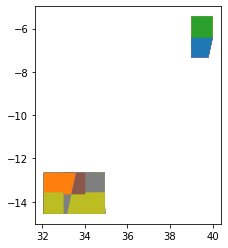

In [95]:
areas = api.to_geodataframe(products)
areas.plot(column='uuid', cmap=None)

Label these polygons

C:\Users\JEANNE~1\AppData\Local\Temp/ipykernel_12224/1206559645.py:2: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  areas.apply(lambda x: ax.annotate(s=x.uuid, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)


4193a46c-1e2f-4383-8d5a-6e292a39fc48    Annotation(33.5218, -14.0737, '4193a46c-1e2f-4...
5d75fbe3-621d-48e5-a267-132934679423    Annotation(34.4346, -14.0604, '5d75fbe3-621d-4...
7c772b70-2019-4153-901d-0b85f5718f0c    Annotation(33.0203, -14.2657, '7c772b70-2019-4...
0b89eb15-b906-4d3c-8ce1-375f0ec549c6    Annotation(32.5835, -13.1599, '0b89eb15-b906-4...
91ccb7d3-20d4-4455-acd3-21cd5719b786    Annotation(32.5819, -14.0643, '91ccb7d3-20d4-4...
                                                              ...                        
07807620-1eb7-411c-ad43-57b30ed73aea    Annotation(39.4862, -6.66779, '07807620-1eb7-4...
396bcc38-826d-4e50-b063-11a05b61d101    Annotation(39.4957, -5.9245, '396bcc38-826d-4e...
d28e04c2-1400-4134-83d7-9659ff3c6f45    Annotation(32.5819, -14.0643, 'd28e04c2-1400-4...
c2a20cc3-7826-43b1-8d57-8622d18f72ff    Annotation(33.1383, -13.9947, 'c2a20cc3-7826-4...
27fa3062-0139-4b51-8292-5ffac238f10a    Annotation(33.2357, -13.1205, '27fa3062-0139-4...
Length: 43

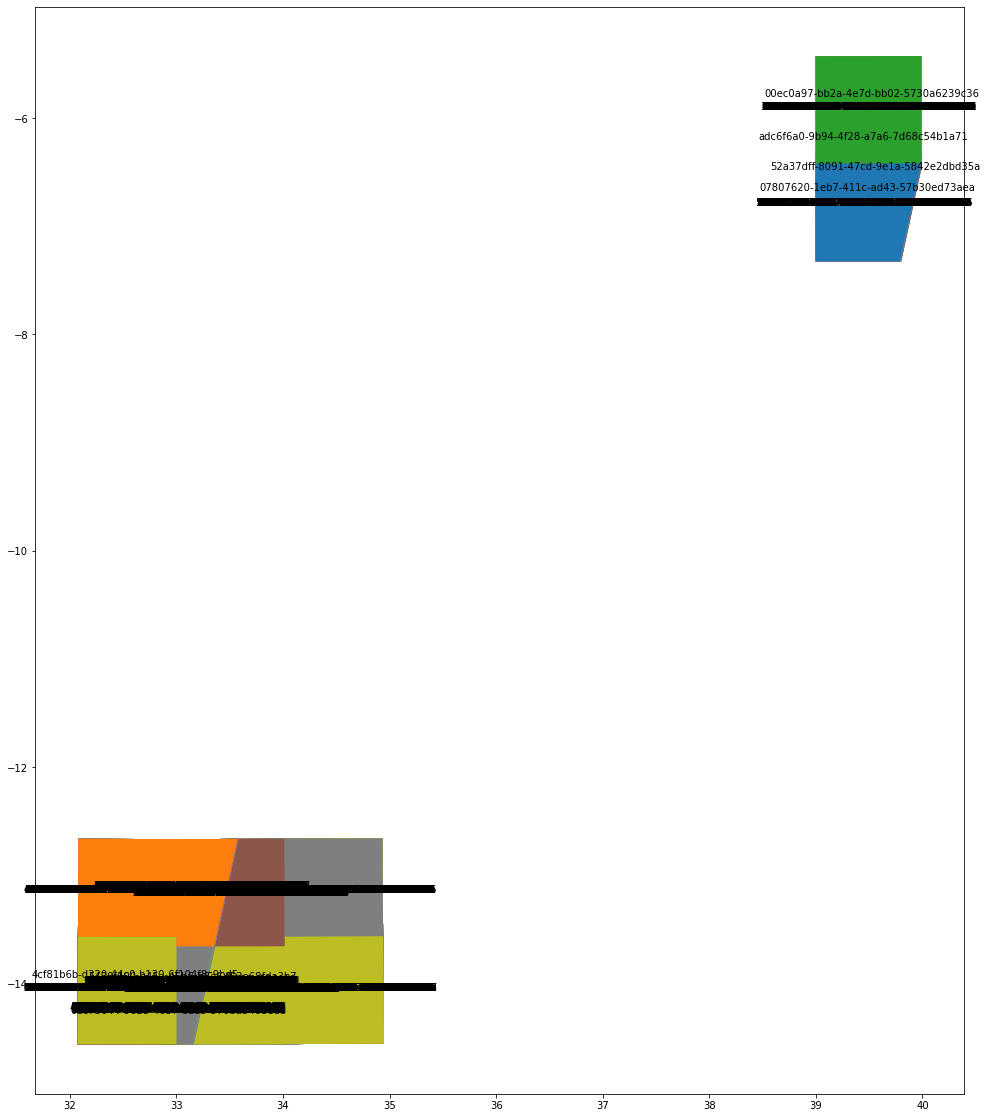

In [96]:
ax = areas.plot(column='uuid', cmap=None, figsize=(20, 20))
areas.apply(lambda x: ax.annotate(s=x.uuid, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)

### Inspect vs our bounds
use geopandas to check which scene to download

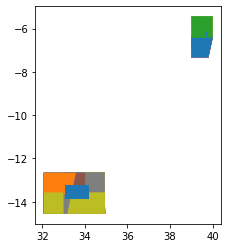

In [97]:
gdf2 = gpd.read_file(boundsdata)
f, ax = plt.subplots(1)
areas.plot(ax=ax,column='uuid',cmap=None,)
gdf2.plot(ax=ax)
plt.show()

In [28]:
#check online api's
def checkProductID():
    for i in range(len(product['uuid'])):
        product_id = api.get_product_odata(product['uuid'][i])
        for j in product_id.keys():
            if (j == 'Online' and product_id[j] == True):
                 print(f"For the index = {i} , the product {product['uuid'][i]}"
                      f" is online")

In [29]:
checkProductID()

For the index = 395 , the product a3de686b-4f52-41d5-9c51-1406818d235f is online
For the index = 397 , the product b64671b9-0175-4f8b-b17b-83daf14dd1b2 is online
For the index = 399 , the product be8c956a-c2a4-4f3c-b441-fdf178bb6f30 is online
For the index = 400 , the product dc0347ab-d54d-488d-a0e0-cec65b2dc610 is online
For the index = 403 , the product b5fab413-149f-422f-9fd0-5c2e6bac8f33 is online
For the index = 408 , the product f7cd30ad-5540-4d36-b3ff-d7f080aa1dcd is online


### Get the uuid and inspect produuct data

In [100]:
api.get_product_odata('39fc7540-d771-4d01-941b-048b1f2c35a0')

{'id': '39fc7540-d771-4d01-941b-048b1f2c35a0',
 'title': 'S2B_MSIL2A_20190226T074859_N0211_R135_T36LWL_20190226T135056',
 'size': 588710311,
 'md5': 'cc525a6a4d841582af979566e5dc1713',
 'date': datetime.datetime(2019, 2, 26, 7, 48, 59, 24000),
 'footprint': 'POLYGON((33.58382456998754 -12.66289811323254,33.56699974452913 -12.738964466052572,33.53429459905632 -12.887551977641914,33.50125934210465 -13.036099764283744,33.46827409008814 -13.1846555064595,33.43531139577928 -13.333178534214245,33.402249926331244 -13.48165937443568,33.369166438881955 -13.630091910239353,33.36335037313839 -13.65614144641153,32.99981507007838 -13.656884794024252,32.99981581315346 -12.664007022186597,33.58382456998754 -12.66289811323254))',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('39fc7540-d771-4d01-941b-048b1f2c35a0')/$value",
 'Online': True,
 'Creation Date': datetime.datetime(2019, 2, 26, 22, 1, 35, 288000),
 'Ingestion Date': datetime.datetime(2019, 2, 26, 21, 59, 22, 323000),
 'quicklo

## Download the data

In [101]:
api.download('39fc7540-d771-4d01-941b-048b1f2c35a0')# to download all available online products at once

MD5 checksumming:   0%|          | 0.00/589M [00:00<?, ?B/s]

{'id': '39fc7540-d771-4d01-941b-048b1f2c35a0',
 'title': 'S2B_MSIL2A_20190226T074859_N0211_R135_T36LWL_20190226T135056',
 'size': 588710311,
 'md5': 'cc525a6a4d841582af979566e5dc1713',
 'date': datetime.datetime(2019, 2, 26, 7, 48, 59, 24000),
 'footprint': 'POLYGON((33.58382456998754 -12.66289811323254,33.56699974452913 -12.738964466052572,33.53429459905632 -12.887551977641914,33.50125934210465 -13.036099764283744,33.46827409008814 -13.1846555064595,33.43531139577928 -13.333178534214245,33.402249926331244 -13.48165937443568,33.369166438881955 -13.630091910239353,33.36335037313839 -13.65614144641153,32.99981507007838 -13.656884794024252,32.99981581315346 -12.664007022186597,33.58382456998754 -12.66289811323254))',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('39fc7540-d771-4d01-941b-048b1f2c35a0')/$value",
 'Online': True,
 'Creation Date': datetime.datetime(2019, 2, 26, 22, 1, 35, 288000),
 'Ingestion Date': datetime.datetime(2019, 2, 26, 21, 59, 22, 323000),
 'quicklo

In [ ]:
#api.download('a0164324-0ff8-4ef7-8bf5-2877680b1456')

Get the path name so we can unzip

In [ ]:
#path_tozip = Out[12]['path'] ##notebook way - will not work in standalone script

Unzip using code found on stackoverflow
<br>
<br>
https://stackoverflow.com/questions/3451111/unzipping-files-in-python

In [103]:
# unzipping the downloaded file
import zipfile
with zipfile.ZipFile("C:/Users/Jeannette/Desktop/ISHANGO-AIMS/S2B_MSIL2A_20190226T074859_N0211_R135_T36LWL_20190226T135056.zip","r") as zip_ref:
    zip_ref.extractall("C:/Users/Jeannette/Desktop/ISHANGO-AIMS/")
